# Applying regression models with pipelines

For this notebook we will:
* Bring over the dataframe we generated in the previous step (Generating features and wrangling)
* Creating a preprocessing pipeline with sklearn to feed our data and apply different models
* Test our first hypothesis:  We can guess the number of monthly interactions a user have with the characteristics of an uploaded recipe, and the history of the user who uploaded it.
* Test our second hypothesis: Changing our dependent variable to be the number of interactions that will happen only in the month after the recipe is submitted, to be able to predict short term activity in our site.

First we import general libraries for data manipulation and plotting, and we will bring sklearn libraries later on as we use them.

In [1]:
#Libraries for tables manipulation
import pandas as pd
import numpy as np
import datetime

#Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#To not receive warning messages
#import warnings
#warnings.filterwarnings('ignore')

Let's take a look to our data

In [2]:
data = pd.read_csv("../data/mvp_export.csv",index_col = 0)

In [3]:
data

,recipe_id,comm_rec_month,in_first30d,no_recipes_submitted,avg_comments_recipes,avg_ratings_recipes,avg_sentiment_recipes,minutes,n_steps,n_ingredients,month_posted,days_since_posted
0,137739,0.018541,3,735,3.068027,4.596259,0.327186,55,11,7,9,4854
1,31490,0.019864,4,366,5.669399,4.324293,0.320801,30,9,6,6,6041
2,112140,0.005932,1,7,1.428571,4.714286,0.410158,130,6,13,2,5057
3,59389,0.010453,2,115,3.721739,4.369417,0.327694,45,11,11,4,5740
4,44061,0.005075,1,91,9.725275,4.375281,0.310879,190,5,8,10,5911
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,486161,0.077754,6,172,4.093023,4.677495,0.346470,60,7,22,8,2315
231633,493372,0.013749,1,1,1.000000,5.000000,-0.086061,5,1,13,1,2182
231634,308080,0.038870,5,2553,4.958480,4.440109,0.339765,40,7,8,6,3859
231635,298512,0.007669,1,40,2.450000,4.176564,0.332633,29,9,10,4,3912


We start transforming categoricals into dtype_objects, as well as our index 

In [4]:
data['month_posted'] = data['month_posted'].astype(object)
data['recipe_id'] = data['recipe_id'].astype(object)

### Looking at the distributions
We first take a look in the distribution of our target variables

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='comm_rec_month', ylabel='Density'>

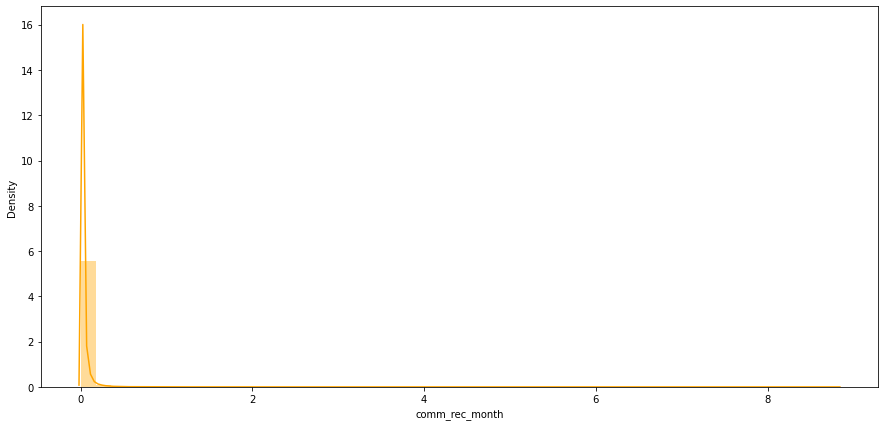

In [5]:
plt.figure(figsize=(15,7))
sns.distplot(data['comm_rec_month'], color='orange')

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='in_first30d', ylabel='Density'>

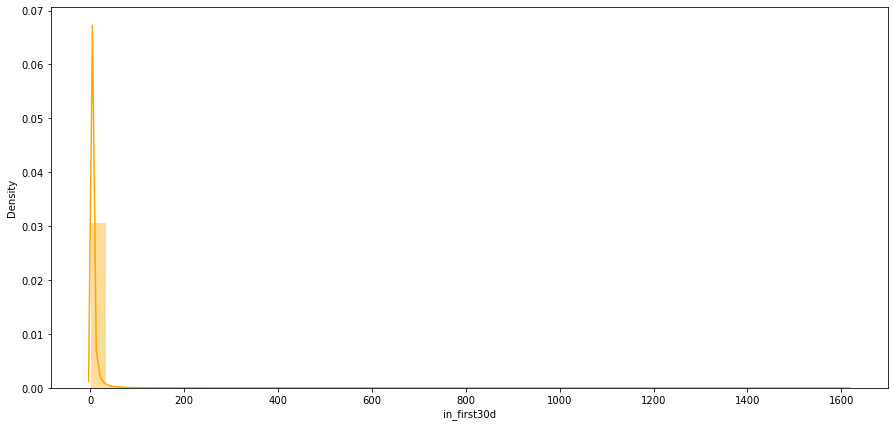

In [6]:
plt.figure(figsize=(15,7))
sns.distplot(data['in_first30d'], color='orange')

checking the distribution of the numerical variables we can see that some scale transformation and we we'll have to deal with some ouliers, as there are very extreme ones, as well as the distributions being very skewed to the right, or to the left in the case of the average ratings. 

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


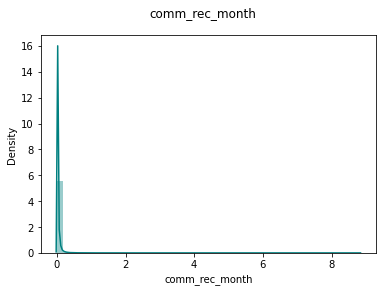

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


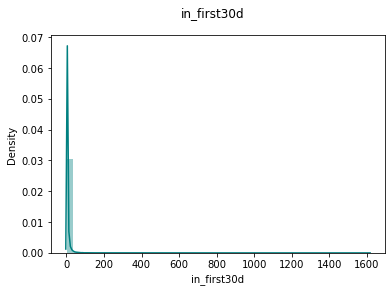

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


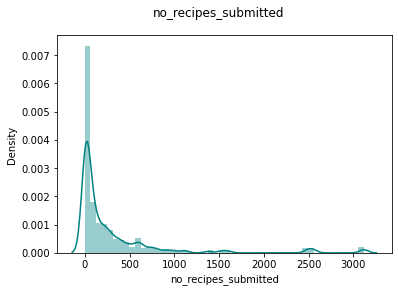

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


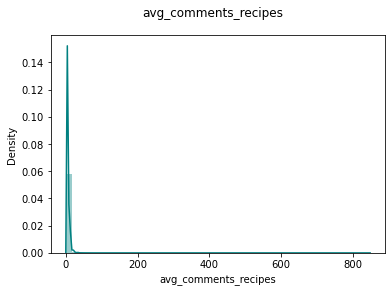

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


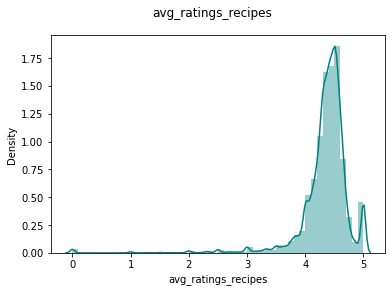

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


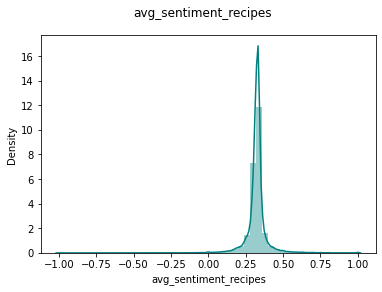

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


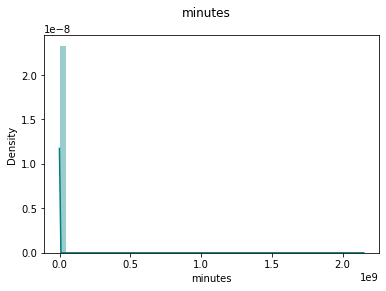

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


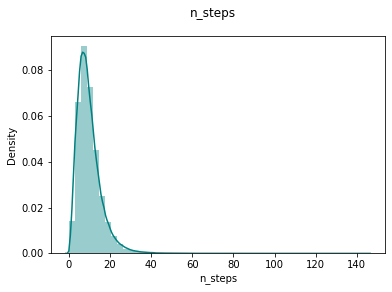

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


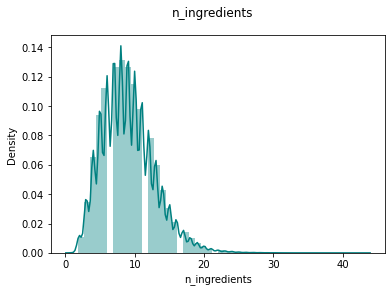

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


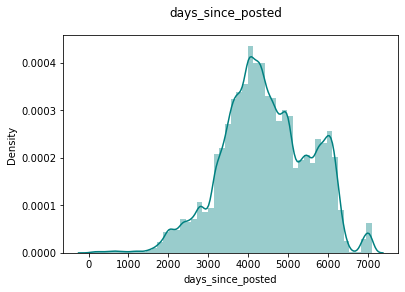

In [7]:
for col in data.select_dtypes([np.number]).columns:
    sns.distplot(data[col], color = 'teal')
    plt.suptitle(col)
    plt.show()

Seeing the column: days_since_posted we see the distribution of when the recipes were being posted. 
The activity in the page lowered considerably after 2010, that's why we see a sudden rise in this variable. We will remove all recipes posted after 1500 days ago (bigger than 1500) and remove those generated shortly when the page was created, when it was less known (taking all smaller than 6500 days) 

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


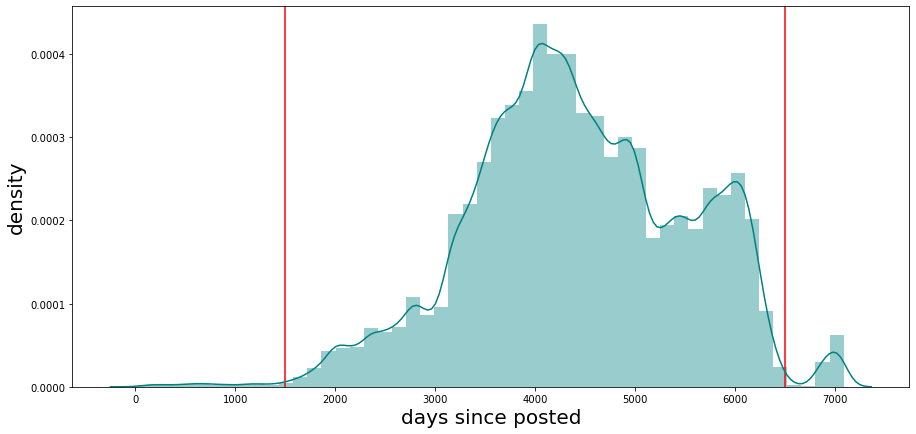

In [8]:
plt.figure(figsize=(15,7))
plt.axvline(1500, color='red')
plt.axvline(6500, color='red')
plot = sns.distplot(data['days_since_posted'], color='teal')
plot.set_xlabel('days since posted',fontsize=20)
plot.set_ylabel('density',fontsize=20)
plt.show();

In [9]:
data = data[data['days_since_posted'].between(1500,6500)]

### Removing outliers
By the look of the distribution of the variables, we will need to clean some outliers and apply some transformation as steps for preprocessing.
We start by checking the numerical variables:

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


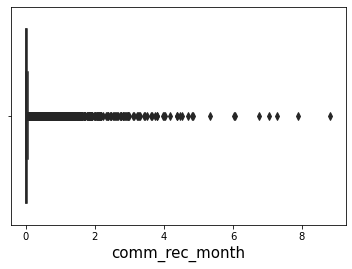

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


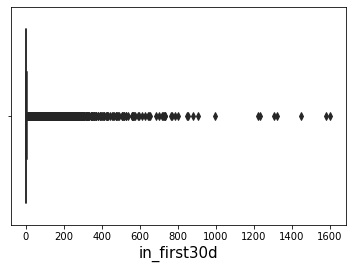

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


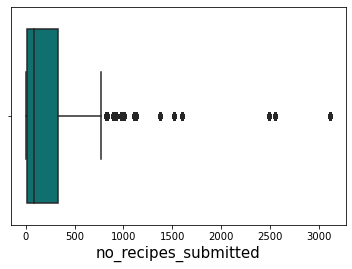

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


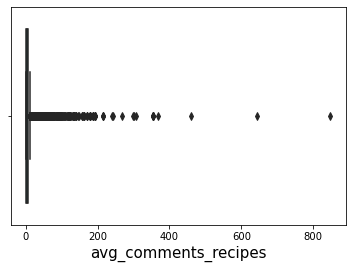

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


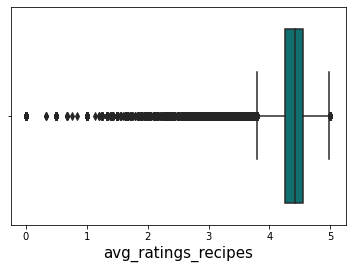

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


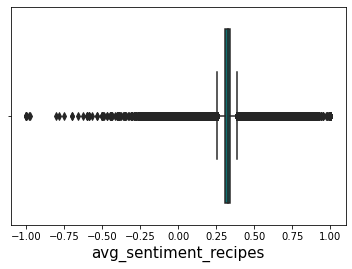

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


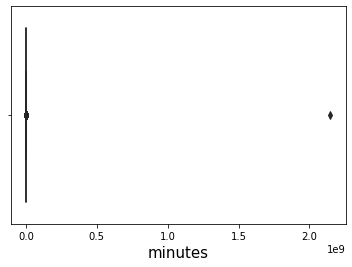

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


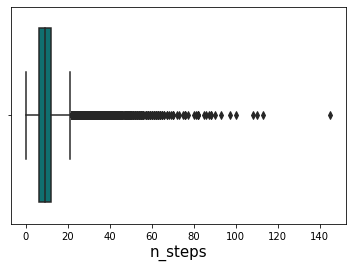

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


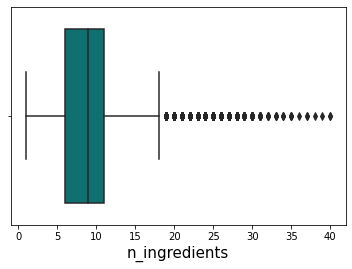

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


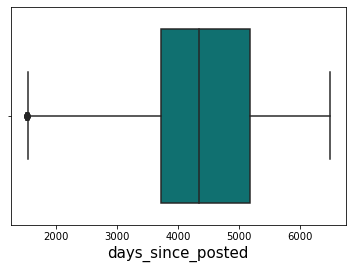

In [10]:
for col in data.select_dtypes([np.number]).columns:
    plot = sns.boxplot(data[col], color = 'teal')
    plot.set_xlabel(col, fontsize = 15)
    plt.show()

We have to be very careful with outliers that correspond to columns other than minutes, n_ingredients and n_steps, as those columns correspond to characteristics of the user that uploaded the recipe, and if we remove users that submitted a lot of recipes, we will remove too many of our database data points. If a good result is not achieved, it might be good to bin these columns and treat them as categoricals

In [11]:
data = data[data['no_recipes_submitted']<2000]
data.shape

(219277, 12)

In [12]:
data = data[data['avg_comments_recipes']<200]
data.shape

(219259, 12)

In [13]:
data = data[data['avg_sentiment_recipes']>-0.75]
data.shape

(219248, 12)

We'll take out all recipes that take over 12 hours to cook

In [14]:
data = data[data['minutes']<720]
data.shape

(216548, 12)

In [15]:
data = data[data['n_steps']<40]
data.shape

(216014, 12)

In [16]:
data = data[data['n_ingredients']<20]
data.shape

(213859, 12)

In [17]:
data = data[data['no_recipes_submitted']<1000]
data.shape

(206562, 12)

### Looking for multicollinearity

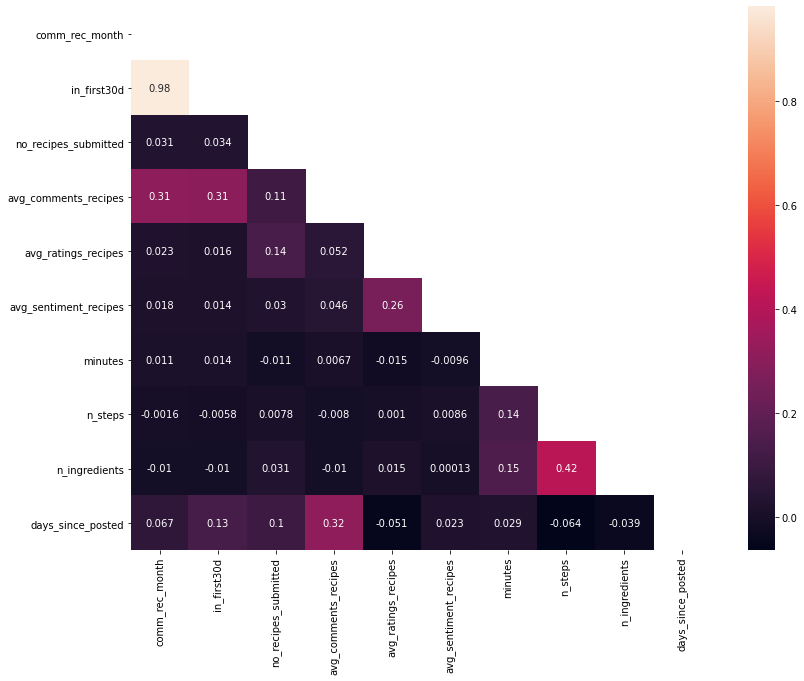

In [18]:
 def corr_matr_show(data):
    correlations_matrix = data.corr()
    mask = np.zeros_like(correlations_matrix)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(13, 10))
    ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
    plt.show()
    
corr_matr_show(data)

From this chart we could take interesting information on how the web works:

* Both dependent variables we want to look for, have a strong correlation. This could indicate that the comments that a recipe receives monthly is strongly determined by the ones received in the first month. 
* Apart from our index and our dependent variables, we can't see any other strong correlation happening, so we won't have to drop any features

## Creating a pipeline
First we need to import all transformers and models we want to use in our pipeline, as well as the pipeline itself

In [19]:
# Preprocessing libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import minmax_scale, StandardScaler, OneHotEncoder, PowerTransformer

# Libraries for linear regression modelling and evaluation
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score


Then we need to define a pipeline of preprocessing for categoricals and numericals separately, as the process we want to put them through is different. 
For categoricals we will use:
* OneHotEncoder: creates a new feature per category and will be labeled as 1 if it belongs to that feature

In [20]:
cat_transf = Pipeline(steps=[
                            ('onehot',OneHotEncoder(handle_unknown='ignore'))
                             ])

Then for numericals we will use:
* PowerTransformer: This transformer will alter the scale in a way that heavily skewed data becomes more normalised
* StandardScaler: will scale our data to have a mean of 0 and standard deviation of 1, preserving the proportions between all data

In [21]:
num_transf = Pipeline(steps=[
                            ('transformer', PowerTransformer()),
                            ('scaler', StandardScaler())
                             ])

This part of the pipeline will choose columns from our data, and put them through one or another pipeline. We use selector function to choose columns based on the type.

In [22]:
preprocessor = ColumnTransformer(transformers=[
                                                ('cat', cat_transf, selector(dtype_include="object")),
                                                ('num', num_transf, selector(dtype_exclude="object"))
                                                 ])

Prototyping the pipeline: Here comes all together, we will first preprocess our data through the previous parts of the pipeline, and then apply a linear regression model.  


In [23]:
pipe_lr = Pipeline([
        ('preprocessing', preprocessor),
        ('regressor',linear_model.LinearRegression())
        ])

Split X and y


In [24]:
X = data.drop(['recipe_id','comm_rec_month','comm_rec_month'], axis=1)
y = data['in_first30d']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=66)

In [43]:
pipe_lr.fit(X_train, y_train)
print("model score: %.3f" % pipe_lr.score(X_test, y_test))

model score: 0.128


In [44]:
y_test_predict = pipe_lr.predict(X_test)

In [45]:
print("MSE:      {:.9f}".format(mean_squared_error(y_test, y_test_predict)))
print("R2 score: {:.3f}".format(r2_score(y_test, y_test_predict)))

MSE:      235.806074974
R2 score: 0.128


In [29]:
pipe_SGDreg = Pipeline([
        ('preprocessing', preprocessor),
        ('SGDregressor',linear_model.SGDRegressor())
        ])

In [48]:
pipe_SGDreg.fit(X_train, y_train)
print("model score: %.3f" % pipe_lr.score(X_test, y_test))

model score: 0.128


In [49]:
y_test_predict = pipe_lr.predict(X_test)

In [50]:
print("MSE:      {:.9f}".format(mean_squared_error(y_test, y_test_predict)))
print("R2 score: {:.3f}".format(r2_score(y_test, y_test_predict)))

MSE:      235.806074974
R2 score: 0.128


In [46]:
pipe_Logreg = Pipeline([
        ('preprocessing', preprocessor),
        ('Logisticregressor',linear_model.LogisticRegression())
        ])

In [ ]:
pipe_Logreg.fit(X_train, y_train)
print("model score: %.3f" % pipe_lr.score(X_test, y_test))

In [31]:
y_test_predict = pipe_lr.predict(X_test)

In [32]:
print("MSE:      {:.9f}".format(mean_squared_error(y_test, y_test_predict)))
print("R2 score: {:.3f}".format(r2_score(y_test, y_test_predict)))

MSE:      235.806074974
R2 score: 0.128


In [33]:
results = pd.DataFrame({'test':y_test,'prediction':y_test_predict})
results

,test,prediction
143421,3,5.699463
98310,1,-1.385986
186255,6,11.524902
103461,15,13.822021
187406,1,-2.190674
...,...,...
51212,3,6.996094
99637,1,-2.681641
78788,1,-0.227051
44352,4,10.436279


<AxesSubplot:xlabel='test', ylabel='prediction'>

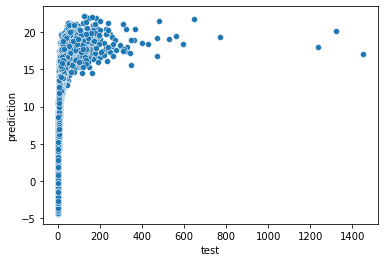

In [34]:
sns.scatterplot(data=results, x='test', y='prediction')

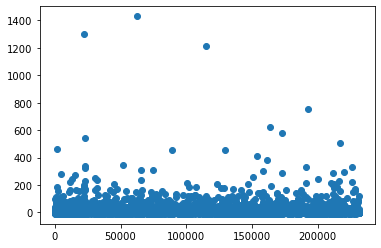

In [35]:
g=plt.plot(y_test - y_test_predict,marker='o',linestyle='')